# 使用`pmdarima`自动进行`ARIMA`时间序列分析

In [3]:
import matplotlib.pyplot as plt  # plots
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations
import seaborn as sns  # more plots
sns.set_theme()

import statsmodels.api as sm
import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt

import pmdarima as pm

## 加载数据

In [4]:
df = pd.read_csv("./data/ads.csv",parse_dates=["Time"],index_col=["Time"])
df.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [5]:
arima = pm.auto_arima(df["Ads"],m=24)
print(arima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  216
Model:             SARIMAX(3, 0, 4)x(2, 0, [1], 24)   Log Likelihood               -2221.457
Date:                              Mon, 14 Feb 2022   AIC                           4466.915
Time:                                      20:51:52   BIC                           4507.418
Sample:                                           0   HQIC                          4483.278
                                              - 216                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.452e+04   2.36e+04      1.040      0.298   -2.17e+04    7.07e+04
ar.L1         -0.87

In [6]:
def tsplot(y, lags=None, figsize=(12, 7), style="bmh"):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        ts_ax.plot(y)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title(
            "Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}".format(p_value)
        )
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

C:\Users\Zarkli\anaconda3\envs\zarkli\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


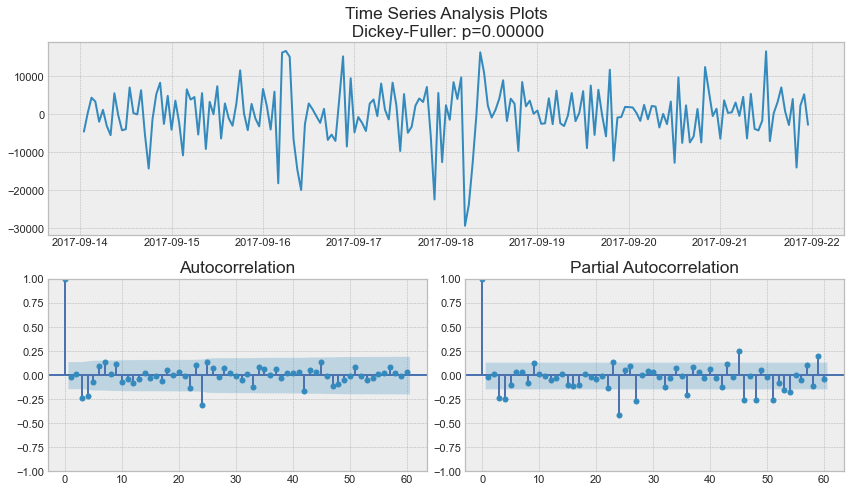

In [13]:
diff = df.Ads - df.Ads.shift(24)
diff = diff - diff.shift(1)
tsplot(diff[24+1:],lags=60)